In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
import tensorflow as tf
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import matplotlib.pyplot as plt
from keras.utils import plot_model
from zipfile import ZipFile
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train=np.loadtxt('drive/MyDrive/DEPI/lab3/input.csv',delimiter=',')
y_train=np.loadtxt('drive/MyDrive/DEPI/lab3/labels.csv',delimiter=',')
x_test=np.loadtxt('drive/MyDrive/DEPI/lab3/input_test.csv',delimiter=',')
y_test=np.loadtxt('drive/MyDrive/DEPI/lab3/labels_test.csv',delimiter=',')

In [ ]:
print('shape of x_train' ,x_train.shape)
print('shape of y_train' ,y_train.shape)
print('shape of x_test' ,x_test.shape)
print('shape of y_test' ,y_test.shape)

shape of x_train (2000, 30000)
shape of y_train (2000,)
shape of x_test (400, 30000)
shape of y_test (400,)


In [ ]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
print(x_train[0])

[[[0.14509804 0.15294118 0.09803922]
  [0.10196078 0.09411765 0.03529412]
  [0.13333333 0.09803922 0.03921569]
  ...
  [0.22352941 0.17254902 0.1372549 ]
  [0.23921569 0.18431373 0.14901961]
  [0.25490196 0.2        0.16470588]]

 [[0.17647059 0.16862745 0.10980392]
  [0.10980392 0.09803922 0.03137255]
  [0.20392157 0.15686275 0.09411765]
  ...
  [0.21176471 0.16078431 0.1254902 ]
  [0.22352941 0.16862745 0.13333333]
  [0.23921569 0.18431373 0.14901961]]

 [[0.20392157 0.17647059 0.10196078]
  [0.1254902  0.09411765 0.01960784]
  [0.27058824 0.21176471 0.1372549 ]
  ...
  [0.21176471 0.15686275 0.11372549]
  [0.21960784 0.16470588 0.12156863]
  [0.23137255 0.17647059 0.13333333]]

 ...

 [[0.07843137 0.15294118 0.        ]
  [0.39607843 0.49019608 0.2627451 ]
  [0.59607843 0.71372549 0.47058824]
  ...
  [0.18039216 0.16078431 0.0745098 ]
  [0.23529412 0.21568627 0.12941176]
  [0.23529412 0.21568627 0.12941176]]

 [[0.18039216 0.25490196 0.03529412]
  [0.45490196 0.54901961 0.32156863]


In [ ]:
print('shape of x_train' ,x_train.shape)
print('shape of y_train' ,y_train.shape)
print('shape of x_test' ,x_test.shape)
print('shape of y_test' ,y_test.shape)

shape of x_train (2000, 100, 100, 3)
shape of y_train (2000, 1)
shape of x_test (400, 100, 100, 3)
shape of y_test (400, 1)


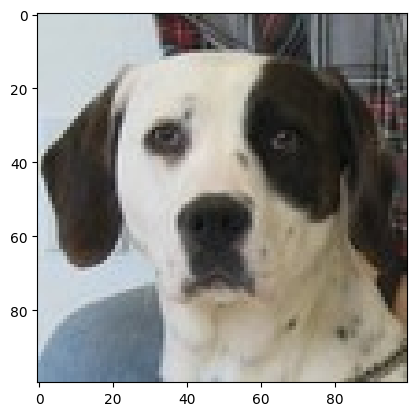

In [ ]:
import random
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train , epochs=5 , batch_size=64)

Epoch 1/5
32/32 [==============================] - 37s 1s/step - loss: 0.6930 - accuracy: 0.5170
Epoch 2/5
32/32 [==============================] - 35s 1s/step - loss: 0.6917 - accuracy: 0.5495
Epoch 3/5
32/32 [==============================] - 36s 1s/step - loss: 0.6758 - accuracy: 0.5805
Epoch 4/5
32/32 [==============================] - 34s 1s/step - loss: 0.6339 - accuracy: 0.6430
Epoch 5/5
32/32 [==============================] - 44s 1s/step - loss: 0.5992 - accuracy: 0.6700


In [ ]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 3s 173ms/step - loss: 0.8161 - accuracy: 0.5775


[0.8160898089408875, 0.5774999856948853]

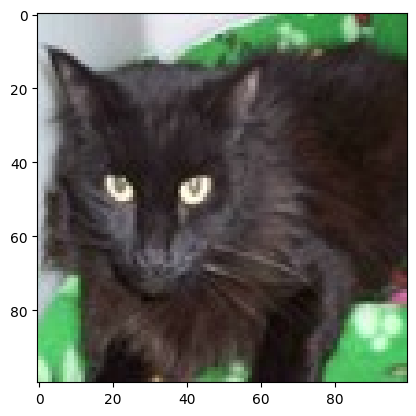

1/1 [==============================] - 0s 31ms/step
our model is a cat


In [ ]:
idx2=random.randint(0,len(x_test))
plt.imshow(x_test[idx2, :])
plt.show()
y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred >0.5
if(y_pred ==0):
  pred='dog'
else:
  pred='cat'
print('our model is a',pred)